In [1]:
import pandas as pd

In [2]:
air_quality = pd.read_csv('https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/air_quality_no2_long.csv')

In [5]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       2068 non-null   object 
 1   country    2068 non-null   object 
 2   date.utc   2068 non-null   object 
 3   location   2068 non-null   object 
 4   parameter  2068 non-null   object 
 5   value      2068 non-null   float64
 6   unit       2068 non-null   object 
dtypes: float64(1), object(6)
memory usage: 113.2+ KB


In [10]:
air_quality['date.utc'] = pd.to_datetime(air_quality['date.utc'])
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   city       2068 non-null   object             
 1   country    2068 non-null   object             
 2   date.utc   2068 non-null   datetime64[ns, UTC]
 3   location   2068 non-null   object             
 4   parameter  2068 non-null   object             
 5   value      2068 non-null   float64            
 6   unit       2068 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 113.2+ KB


In [12]:
print(air_quality['date.utc'].min())
print(air_quality['date.utc'].max())

2019-05-07 01:00:00+00:00
2019-06-21 00:00:00+00:00


In [13]:
air_quality['date.utc'].max() - air_quality['date.utc'].min()

Timedelta('44 days 23:00:00')

In [15]:
air_quality['month'] = air_quality['date.utc'].dt.month
air_quality['hour'] = air_quality['date.utc'].dt.hour
air_quality

,city,country,date.utc,location,parameter,value,unit,month,hour
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6,0
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6,23
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6,22
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,6,21
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,6,20
...,...,...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³,5,6
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³,5,4
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³,5,3
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³,5,2


In [16]:
air_quality.groupby('hour')['value'].mean()

hour
0     27.955294
1     26.125688
2     23.558511
3     23.242683
4     22.979518
5     27.070732
6     30.635632
7     31.346591
8     29.138636
9     26.071591
10    22.602326
11    21.275294
12    21.029762
13    21.008235
14    21.737647
15    23.840000
16    24.972619
17    26.691667
18    27.089412
19    28.143529
20    29.372941
21    30.973256
22    32.451282
23    31.189412
Name: value, dtype: float64

Text(0, 0.5, 'Air quality')

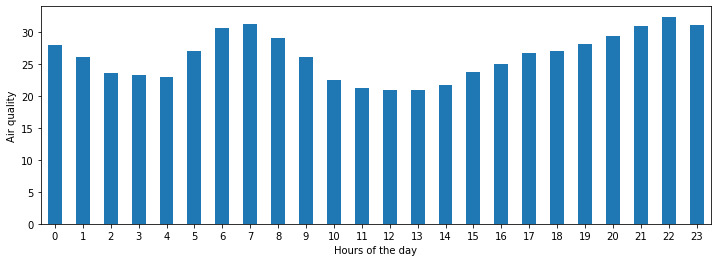

In [21]:
import matplotlib.pyplot as plt
fig, axis = plt.subplots(figsize=(12,4))
air_quality.groupby('hour')['value'].mean().plot(kind='bar', ax=axis, rot=0)

axis.set_xlabel('Hours of the day')
axis.set_ylabel('Air quality')

# Datetime as index

In [23]:
no2 = air_quality.pivot(index="date.utc", columns='location', values='value')

In [27]:
no2.index


DatetimeIndex(['2019-05-07 01:00:00+00:00', '2019-05-07 02:00:00+00:00',
               '2019-05-07 03:00:00+00:00', '2019-05-07 04:00:00+00:00',
               '2019-05-07 05:00:00+00:00', '2019-05-07 06:00:00+00:00',
               '2019-05-07 07:00:00+00:00', '2019-05-07 08:00:00+00:00',
               '2019-05-07 09:00:00+00:00', '2019-05-07 10:00:00+00:00',
               ...
               '2019-06-20 15:00:00+00:00', '2019-06-20 16:00:00+00:00',
               '2019-06-20 17:00:00+00:00', '2019-06-20 18:00:00+00:00',
               '2019-06-20 19:00:00+00:00', '2019-06-20 20:00:00+00:00',
               '2019-06-20 21:00:00+00:00', '2019-06-20 22:00:00+00:00',
               '2019-06-20 23:00:00+00:00', '2019-06-21 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='date.utc', length=1033, freq=None)

<AxesSubplot:xlabel='date.utc'>

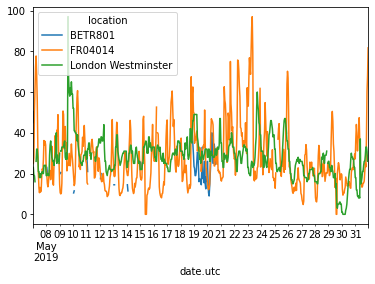

In [28]:
no2['2019-05-07':'2019-05-31'].plot()

# Resample
그룹바이와 비슷한 개념으로 이해하면 좋음

In [33]:
monthly_max = no2.resample("M").max()
monthly_max.index.freq

<MonthEnd>

In [35]:
daily_mean = no2.resample("D").mean()
daily_mean

location,BETR801,FR04014,London Westminster
date.utc,,,
2019-05-07 00:00:00+00:00,47.75000,33.986957,22.190476
2019-05-08 00:00:00+00:00,21.75000,25.012500,26.521739
2019-05-09 00:00:00+00:00,20.25000,27.795833,44.652174
2019-05-10 00:00:00+00:00,11.00000,32.854167,33.458333
2019-05-11 00:00:00+00:00,23.75000,26.804762,31.157895
2019-05-12 00:00:00+00:00,18.75000,18.108333,27.708333
2019-05-13 00:00:00+00:00,14.50000,21.662500,29.000000
2019-05-14 00:00:00+00:00,13.00000,22.804167,28.208333
2019-05-15 00:00:00+00:00,24.00000,20.800000,31.260870


<AxesSubplot:xlabel='date.utc'>

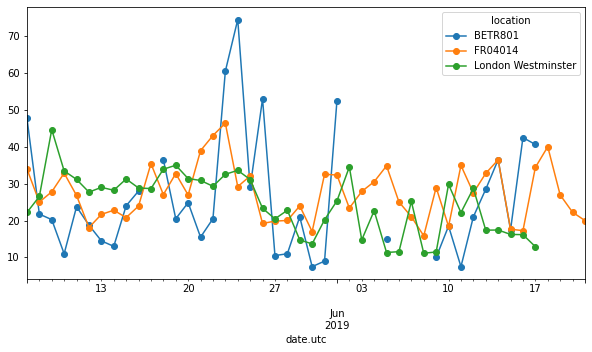

In [39]:
daily_mean.plot(figsize=(10,5), style="-o")